# 02: Creating Plots

*xarray* has a built-in plotting functionality that allows you to visualize the data. However, this plotting functionality is built on top of another popular Python library called *matplotlib*. So, before you can use xarray's plotting functions, you need to make sure that Matplotlib is installed in your Python environment, as *xarray* depends on it for creating the visualizations. 

## Opening a file

We will start by looking at a depth profile of Chlorophyll A data. If you use these data in a publication, please cite them in your list of references with the following citation:

Anna Vader, Lucie Goraguer, Luke Marsden (2022) Chlorophyll A and phaeopigments Nansen Legacy cruise 2021708 station P4 (NLEG11) 2021-07-18T08:50:42 https://doi.org/10.21335/NMDC-1248407516-P4(NLEG11)

In [1]:
import xarray as xr
netcdf_file = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset>
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 323.0 200.3 120.1 ... 20.12 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 ...
    EVENTID_TOTAL        (DEPTH) |S64 ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 ...
    FILTERED_VOL_10um    (DEPTH) float64 ...
    EVENTID_10um         (DEPTH) |S64 ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

Okay, now let's see if we can plot some of the variables above.

## Variables with one dimension

Variables with one dimension can be plotted as scatter or line plots. Let's have a look at some examples

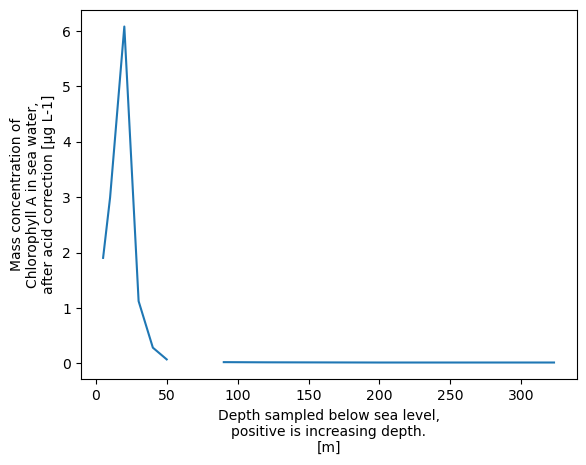

In [2]:
xrds['CHLOROPHYLL_A_TOTAL'].plot()

That doesn't look nice! if we look at the values we can see what is happening.

In [3]:
xrds['CHLOROPHYLL_A_TOTAL'].values

array([0.01565072, 0.01550788, 0.01912119, 0.02236113,        nan,
       0.07194841, 0.28370929, 1.12279562, 6.07793473, 2.99329871,
       1.90354194])

Then let's drop the nan values before we plot the data.

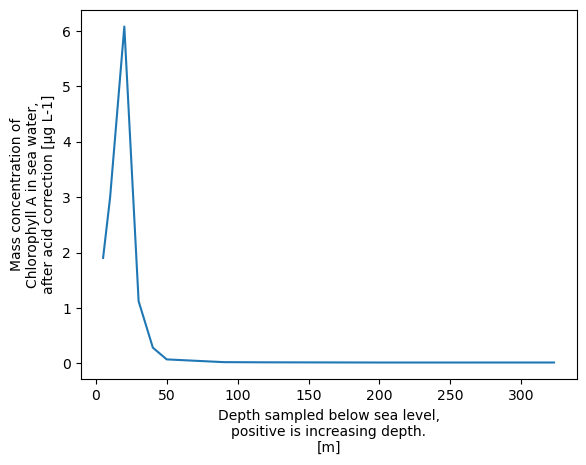

In [4]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'))

It makes more sense to have depth on the y axis, so let's do that

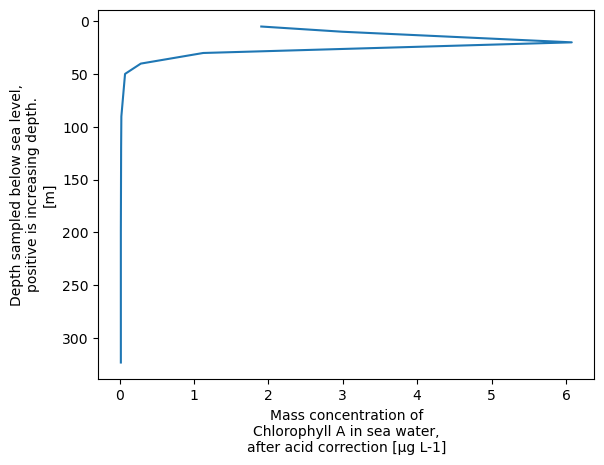

In [5]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'),y='DEPTH', yincrease=False)

Altneratively, we can easily create a scatter plot

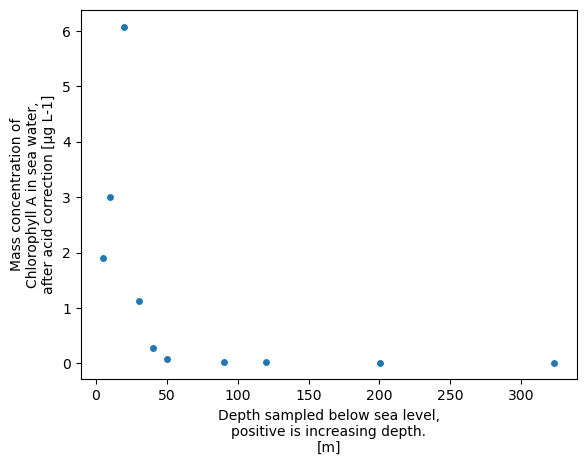

In [6]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.scatter()

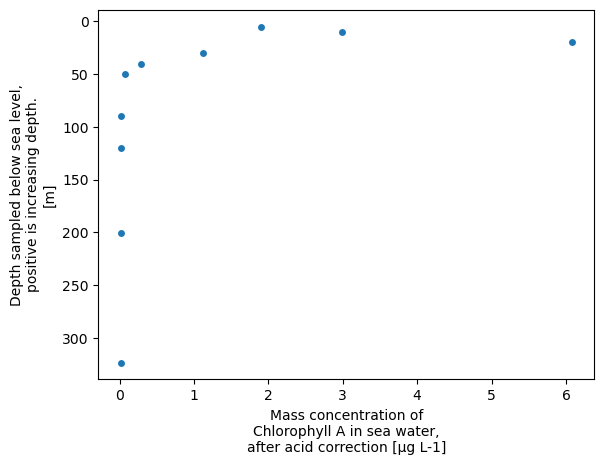

In [7]:
xrds.plot.scatter(x='CHLOROPHYLL_A_TOTAL', y='DEPTH', yincrease=False)

Let's try some alternative plots

(array([6., 1., 0., 1., 1., 0., 0., 0., 0., 1.]),
 array([0.01550788, 0.62175057, 1.22799325, 1.83423594, 2.44047862,
        3.04672131, 3.65296399, 4.25920668, 4.86544936, 5.47169204,
        6.07793473]),
 <BarContainer object of 10 artists>)

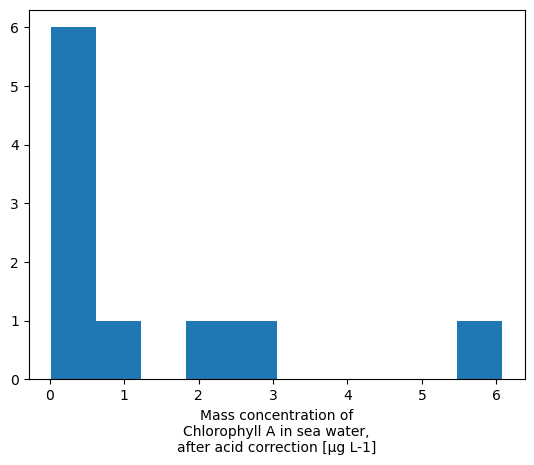

In [8]:
# Histogram
xrds['CHLOROPHYLL_A_TOTAL'].plot.hist()

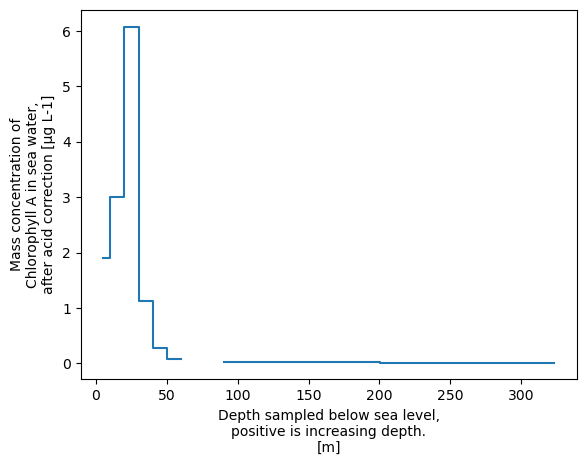

In [9]:
# Step plot
xrds['CHLOROPHYLL_A_TOTAL'].plot.step()

We can also plot multiple variables together

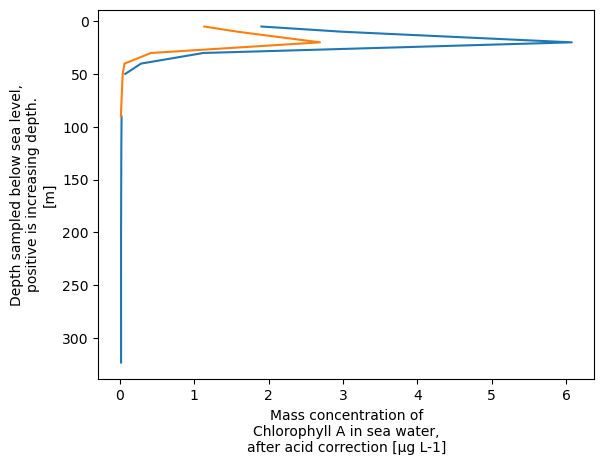

In [10]:
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')

But if we actually want to see the labels, we need to use the matplotlib library

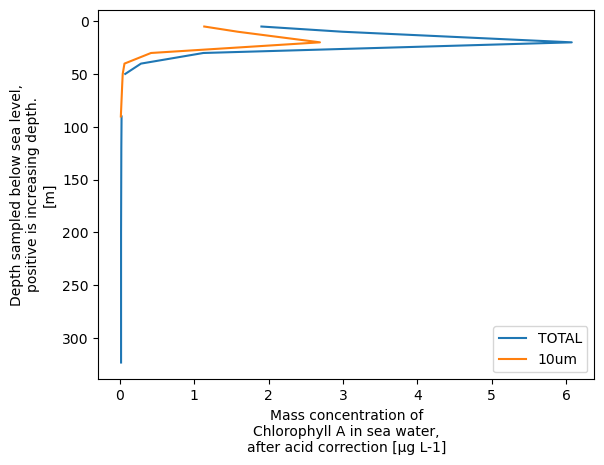

In [11]:
import matplotlib.pyplot as plt
xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')
plt.legend()
plt.show()

We can now do all kinds of things to customise this plot using the full matplotlib library. For example:

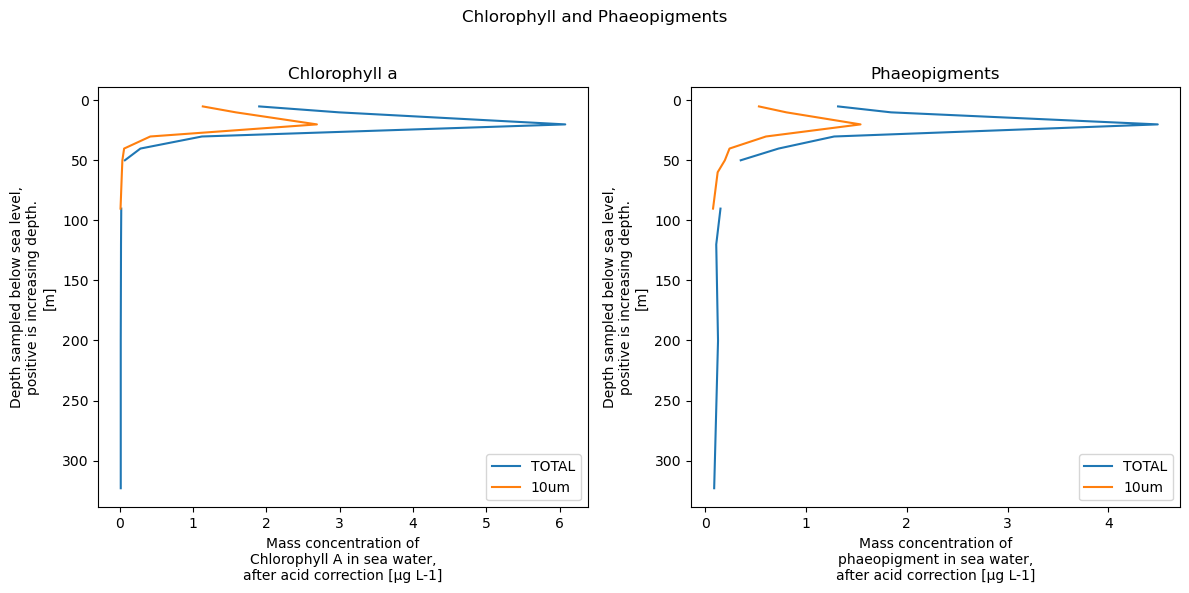

In [12]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[0])
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[0])
axes[0].set_title('Chlorophyll a')
axes[0].legend()

xrds['PHAEOPIGMENTS_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='TOTAL', ax=axes[1])
xrds['PHAEOPIGMENTS_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax=axes[1])
axes[1].set_title('Phaeopigments')
axes[1].legend()

# Adjust layout and display the plot
plt.suptitle('Chlorophyll and Phaeopigments')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to avoid overlap
plt.show()

## 2D plots - e.g. maps

We will load in some multidimensional data now. This is a dataset of global surface temperature anomalies from the NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0.

https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C01585 

H.-M. Zhang, B. Huang, J. H. Lawrimore, M. J. Menne, and T. M. Smith (2019): NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. NOAA National Centers for Environmental Information. doi:10.25921/9qth-2p70 Accessed 2024-01-04.

In [13]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

The *anom* variable has 4 dimensions. We firstly want to access data from a single timeslice (one day).

In [14]:
desired_date = '2022-10-01'
data_for_desired_date = xrds.sel(time=desired_date)
data_for_desired_date

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 2022-10-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

Let's plot the data!

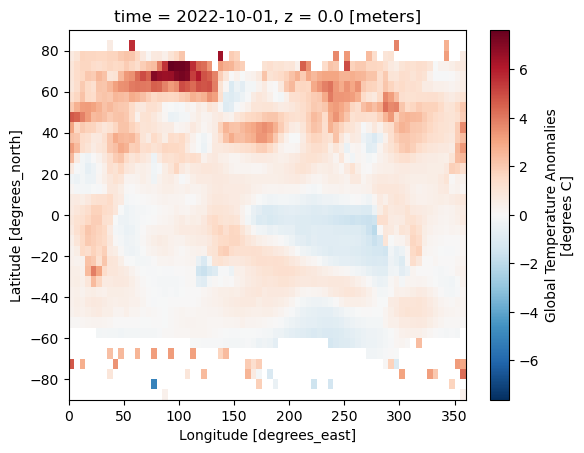

In [15]:
data_for_desired_date['anom'].plot()

Without the coastlines this is difficult to interpret. We can use the *cartopy*  to help use here.

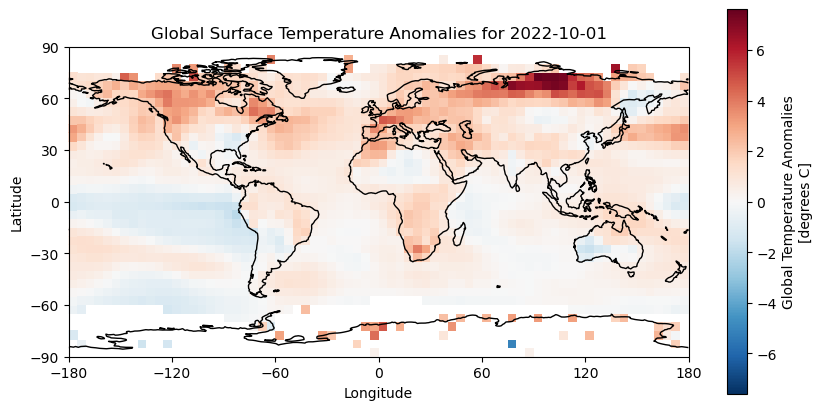

In [16]:
import cartopy.crs as ccrs
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
data_for_desired_date['anom'].plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title(f'Global Surface Temperature Anomalies for {desired_date}')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('../data/media/temperature_anomalies.png')
plt.show()

This is designed only to be a short demonstration of how easy it can be to plot data out of a CF-NetCDF file. Matplotlib is very powerful and flexible, and you can use it to create all sorts of plots! There are many good tutorials on how to use matplotlib online, so go and explore!